<a href="https://colab.research.google.com/github/ashwinsathish/instr-forum-task/blob/main/Ashwin_FashionMNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_MNIST Dataset Classification

## Loading the dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [3]:
print(tf.keras.__version__)

2.8.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(trainx, trainy), (testx, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 
               'Trouser',
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

## Exploring the dataset 

In [7]:
trainx.shape

(60000, 28, 28)

Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Since a convolutional layer takes a 2-D image (2-D array) as input, we needn't convert these 2-D images to a 1-D arrays

If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [8]:
trainy.shape
testx.shape
testy.shape

(10000,)

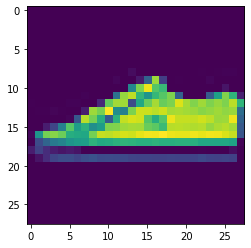

In [9]:
plt.figure()
plt.imshow(np.squeeze(trainx[279]))

In [10]:
obj = trainy[279]
print(class_names[obj])

Sneaker


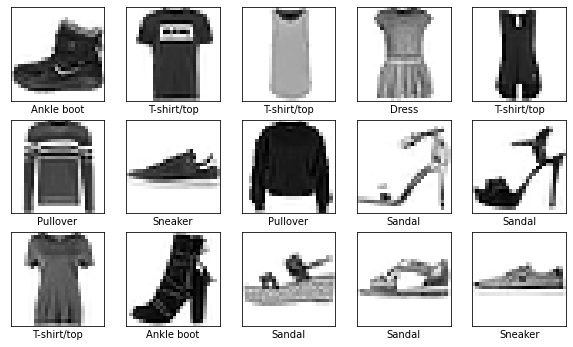

In [11]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainx[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[trainy[i]])
plt.show()

## MinMax Scaling

In [12]:
trainx = trainx.reshape((60000, 28, 28, 1))
testx = testx.reshape((10000, 28, 28, 1))

In [13]:
trainx[0].min()

0

In [14]:
trainx[0].max()

255

- The pixel values of these images range between 0-255. We try to instead normalize this range from 0-1 

- MinMax scaling is based on the normalization procedure of : **new_data = (data-min)/(max-min)**

- Since pixels range from min of 0 to max of 255 the scaled image size will result as => **(data-0)/(255-0) = data/255**



In [15]:
trainx_norm = trainx / 255.0
testx_norm = testx / 255.0

## Designing a CNN for classification

In [16]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')

max_pool1 = layers.MaxPooling2D((2,2))
max_pool2 = layers.MaxPooling2D((2,2))
max_pool3 = layers.MaxPooling2D((2,2))

flat_layer = layers.Flatten()
fc = layers.Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001))

output = layers.Dense(10, 'softmax', kernel_regularizer = keras.regularizers.l2(0.001))

drop1 = keras.layers.Dropout(0.4)
drop2 = keras.layers.Dropout(0.6)

In [17]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(max_pool2)
model.add(drop1)
model.add(conv3)
model.add(max_pool3)
model.add(drop2)
model.add(flat_layer)
model.add(fc)
model.add(output)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
          )

In [19]:
history = model.fit(trainx_norm, 
                    trainy, 
                    epochs=20, 
                    validation_data = (testx_norm, testy),
                    shuffle=True, 
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/20
94/94 [==============================] - 17s 37ms/step - loss: 1.0655 - accuracy: 0.6918 - val_loss: 0.7021 - val_accuracy: 0.8221
Epoch 2/20
94/94 [==============================] - 3s 30ms/step - loss: 0.6766 - accuracy: 0.8202 - val_loss: 0.5807 - val_accuracy: 0.8537
Epoch 3/20
94/94 [==============================] - 3s 30ms/step - loss: 0.5786 - accuracy: 0.8477 - val_loss: 0.4995 - val_accuracy: 0.8710
Epoch 4/20
94/94 [==============================] - 3s 31ms/step - loss: 0.5113 - accuracy: 0.8635 - val_loss: 0.4504 - val_accuracy: 0.8855
Epoch 5/20
94/94 [==============================] - 3s 30ms/step - loss: 0.4657 - accuracy: 0.8730 - val_loss: 0.4092 - val_accuracy: 0.8933
Epoch 6/20
94/94 [==============================] - 3s 31ms/step - loss: 0.4337 - accuracy: 0.8775 - val_loss: 0.4066 - val_accuracy: 0.8840
Epoch 7/20
94/94 [==============================] - 3s 31ms/step - loss: 0.4075 - accuracy: 0.8851 - val_loss: 0.3789 - val_accuracy: 0.8946
Epoch 8/20
9

In [20]:
test_loss, test_accuracy = model.evaluate(testx_norm, testy)
print(test_accuracy)
print(test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.9164
0.9164000153541565
0.3003503382205963


## Model evaluation

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

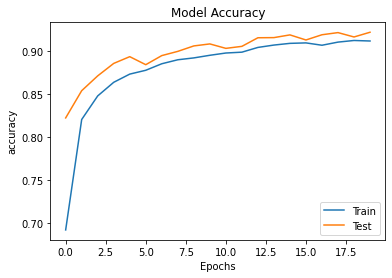

In [22]:
# Train vs test accuracy plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

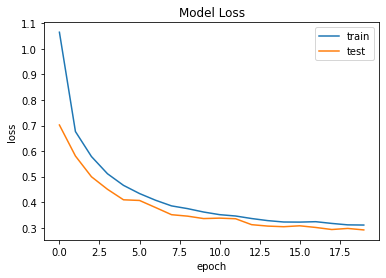

In [23]:
# Train vs test loss plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The graphs abve depict that the model is free from any over/underfitting issues

## Model testing

In [24]:
pred_testy = model.predict(testx_norm)
pred_testy.shape

(10000, 10)

In [25]:
pred_testy[92]

array([3.5590868e-04, 8.4321096e-07, 4.8958454e-03, 6.9927723e-05,
       1.1601044e-02, 8.3880934e-07, 9.8306006e-01, 8.3809527e-07,
       1.2767483e-05, 1.8713234e-06], dtype=float32)

The above values represent probabilities of the object in pred_testy[92] being any of the 10 classes of fashion_mnist. The index with maximum probability among all gives us the respective class of the object

In [26]:
pred_testy_index = np.argmax(pred_testy[92])
pred_testy_index

6

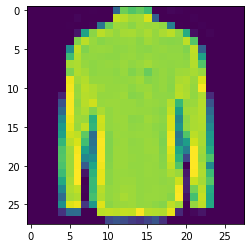

In [27]:
# testing a random pic from the dataset

plt.figure()
plt.imshow(np.squeeze(testx[92]))

In [28]:
obj = testy[92]
print(class_names[obj])

Shirt
